In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from importlib import reload
import base
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers
import cvae_tfp
tf.keras.backend.set_floatx('float32')

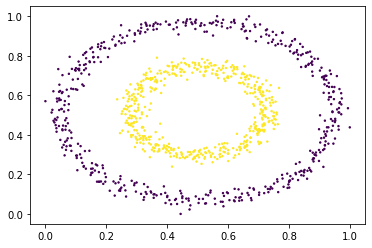

In [43]:
data, conditions = make_circles(n_samples=1000, noise=0.05, factor=0.5)
data = np.float32(data)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
# Plot dataset
plt.scatter(*data.T, c=conditions, s=2)
plt.show()
data = utils.as_float_array(data)
data_cond = utils.as_float_array(conditions)
data_cond = data_cond.reshape(-1, 1)

## Normal

In [3]:
reload(cvae_tfp)
data_dim = 2
cond_dim = 1
latent_dim = 4
hidden_dim = 10
x_input = [data, data_cond]
encoder = cvae_tfp.Encoder(data_dim, cond_dim, latent_dim, hidden_dim)
sampler = cvae_tfp.NormalSampler(latent_dim)
encodersampler = cvae_tfp.EncoderSampler(encoder,sampler)
decoder = cvae_tfp.Decoder(data_dim, cond_dim, latent_dim, hidden_dim)
weight = 0.02
model_normal = cvae_tfp.CVAE_circle(data_dim, cond_dim, latent_dim, hidden_dim, weight, decoder, encodersampler)
def zero_error(y_true, y_pred):
    return tf.constant(0., dtype='float32')
model_normal.compile(optimizer='adam', loss=zero_error)
model_normal.evaluate(x = x_input, y = x_input[0])

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.
32/32 [==============================] - 1s 740us/step - loss: 0.1825


0.17215073108673096

In [4]:
model_normal.fit(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)), epochs=5000,\
                 batch_size=data.shape[0], verbose = True)

Epoch 1/5000
1/1 [==============================] - 1s 1s/step - loss: 0.1757
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1734
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1723
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1759
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1744
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1720
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1742
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1732
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1687
Epoch 10/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1616
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1701
Epoch 12/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1667
Epoch 13/5000
1/1 [=============================

1/1 [==============================] - 0s 2ms/step - loss: 0.1353
Epoch 104/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1375
Epoch 105/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1345
Epoch 106/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1345
Epoch 107/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1337
Epoch 108/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1348
Epoch 109/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1351
Epoch 110/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1322
Epoch 111/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1339
Epoch 112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1320
Epoch 113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1345
Epoch 114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1354
Epoch 115/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.1316
Epoch 205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1311
Epoch 207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1310
Epoch 208/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1311
Epoch 209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1312
Epoch 210/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 211/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1323
Epoch 212/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1308
Epoch 213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1323
Epoch 214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1338
Epoch 215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 216/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.1293
Epoch 306/5000
1/1 [==============================] - 0s 997us/step - loss: 0.1283
Epoch 307/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1284
Epoch 308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1290
Epoch 309/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1297
Epoch 310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1254
Epoch 311/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1274
Epoch 312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1289
Epoch 313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1286
Epoch 315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1280
Epoch 317/5000
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 0.1223
Epoch 407/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1218
Epoch 408/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1220
Epoch 409/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1202
Epoch 410/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1197
Epoch 411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1237
Epoch 412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1195
Epoch 413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1201
Epoch 414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1194
Epoch 415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1228
Epoch 416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1187
Epoch 417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1187
Epoch 418/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.1056
Epoch 508/5000
1/1 [==============================] - 0s 962us/step - loss: 0.1066
Epoch 509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1076
Epoch 510/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1098
Epoch 511/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1063
Epoch 512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1089
Epoch 513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1061
Epoch 514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1051
Epoch 515/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1052
Epoch 516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1070
Epoch 517/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1066
Epoch 518/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1060
Epoch 519/5000
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 0.0930
Epoch 609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0919
Epoch 610/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0946
Epoch 611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0928
Epoch 612/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0933
Epoch 613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0939
Epoch 614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0911
Epoch 616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0915
Epoch 617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0925
Epoch 618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0918
Epoch 619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0929
Epoch 620/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0790
Epoch 710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0795
Epoch 711/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0812
Epoch 712/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0797
Epoch 714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0797
Epoch 717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0789
Epoch 718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0781
Epoch 719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0766
Epoch 720/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0775
Epoch 721/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0704
Epoch 811/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 812/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0720
Epoch 813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0718
Epoch 814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0721
Epoch 815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0701
Epoch 817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0722
Epoch 818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0695
Epoch 820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0697
Epoch 821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 822/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 912/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0679
Epoch 913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0674
Epoch 914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0678
Epoch 920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 923/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 1013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 1014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 1015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 1016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 1017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 1018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0657
Epoch 1019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 1020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0651
Epoch 1021/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0662
Epoch 1022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 1023/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 1024/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 1113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 1114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 1115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 1116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 1117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 1118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 1119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0641
Epoch 1120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 1121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0641
Epoch 1122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0643
Epoch 1123/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 1124/5000
1/1 [===========

1/1 [==============================] - 0s 997us/step - loss: 0.0637
Epoch 1213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0641
Epoch 1214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 1215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0629
Epoch 1216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 1217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 1218/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 1219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 1220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 1221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 1222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0636
Epoch 1223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 1224/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 1312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 1313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 1314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 1315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 1316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 1317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 1318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 1319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 1320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 1321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 1322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 1323/5000
1/1 [===========

Epoch 1411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 1412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 1413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 1414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 1415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 1416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0624
Epoch 1417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 1418/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 1419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0607
Epoch 1420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 1421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0625
Epoch 1422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0620
Epoch 1423/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 1511/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 1512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 1513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 1514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 1515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 1516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 1517/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0620
Epoch 1518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 1519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 1520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 1521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 1522/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 1610/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 1611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0602
Epoch 1612/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0603
Epoch 1613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 1614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 1615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 1616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 1617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 1618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 1619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 1620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 1621/5000
1/1 [===========

Epoch 1709/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 1710/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0606
Epoch 1711/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0600
Epoch 1712/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0596
Epoch 1713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 1714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0605
Epoch 1715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 1716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 1717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 1718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 1719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 1720/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0597
Epoch 1721/500

1/1 [==============================] - 0s 2ms/step - loss: 0.0596
Epoch 1809/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0607
Epoch 1810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0588
Epoch 1811/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0602
Epoch 1812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 1813/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0598
Epoch 1814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 1815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 1816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 1817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 1818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 1819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 1820/5000
1/1 [=========

Epoch 1908/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0605
Epoch 1909/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 1910/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 1911/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0595
Epoch 1912/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 1913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 1914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 1915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0600
Epoch 1916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0602
Epoch 1917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 1918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 1919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 1920/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 2008/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 2009/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 2010/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0593
Epoch 2011/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 2012/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0596
Epoch 2013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0579
Epoch 2014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 2015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 2016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 2017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 2018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0581
Epoch 2019/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 2108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0588
Epoch 2109/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0584
Epoch 2110/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 2111/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 2112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 2113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 2114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 2115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0595
Epoch 2116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 2117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0581
Epoch 2118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 2119/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 2207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 2208/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 2209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 2210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 2211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 2212/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0582
Epoch 2213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0595
Epoch 2214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 2215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 2216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0584
Epoch 2217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 2218/5000
1/1 [===========

Epoch 2306/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 2307/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 2308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 2309/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 2310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 2311/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 2312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 2313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 2314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 2315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 2316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 2317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 2318/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 2406/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0567
Epoch 2407/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 2408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 2409/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 2410/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0581
Epoch 2411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 2412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 2413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 2414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 2415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0576
Epoch 2416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 2417/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 2506/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 2507/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 2508/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 2509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 2510/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 2511/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 2512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 2513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 2514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 2515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 2516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 2517/5000
1/1 [===========

1/1 [==============================] - 0s 998us/step - loss: 0.0569
Epoch 2606/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 2607/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 2608/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 2609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 2610/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 2611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 2612/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 2613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 2614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 2615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 2616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0567
Epoch 2617/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 2705/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0567
Epoch 2706/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0558
Epoch 2707/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0567
Epoch 2708/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 2709/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 2710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 2711/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 2712/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0565
Epoch 2713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 2714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 2715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 2716/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 2804/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 2805/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 2806/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0558
Epoch 2807/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 2808/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 2809/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0567
Epoch 2810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 2811/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0551
Epoch 2812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 2813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 2814/5000
1/1 [==============================] - 0s 961us/step - loss: 0.0560
Epoch 2815/5000
1/1 [=======

1/1 [==============================] - 0s 3ms/step - loss: 0.0559
Epoch 2903/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 2904/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0558
Epoch 2905/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 2906/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0553
Epoch 2907/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 2908/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 2909/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0557
Epoch 2910/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0557
Epoch 2911/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0567
Epoch 2912/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 2913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0547
Epoch 2914/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 3003/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 3004/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 3005/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 3006/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 3007/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 3008/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 3009/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 3010/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 3011/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 3012/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 3013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 3014/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 3103/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 3104/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 3105/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 3106/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0553
Epoch 3107/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 3108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 3109/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0548
Epoch 3110/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 3111/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 3112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 3113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0549
Epoch 3114/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 3203/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 3204/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 3205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 3206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 3207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 3208/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 3209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 3210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 3211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 3212/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 3213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 3214/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 3303/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 3304/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 3305/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0550
Epoch 3306/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 3307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 3308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 3309/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 3310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 3311/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 3312/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0539
Epoch 3313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 3314/5000
1/1 [=========

Epoch 3402/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 3403/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 3404/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 3405/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 3406/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 3407/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 3408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 3409/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 3410/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 3411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 3412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 3413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 3414/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 3502/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 3503/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0539
Epoch 3504/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0534
Epoch 3505/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 3506/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 3507/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 3508/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 3509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 3510/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 3511/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0538
Epoch 3512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 3513/5000
1/1 [=====

1/1 [==============================] - 0s 965us/step - loss: 0.0541
Epoch 3601/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 3602/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 3603/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 3604/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 3605/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 3606/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 3607/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0538
Epoch 3608/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 3609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 3610/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 3611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 3612/5000
1/1 [=======

1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 3700/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 3701/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0535
Epoch 3702/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 3703/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 3704/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 3705/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 3706/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 3707/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 3708/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 3709/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 3710/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 3711/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 3800/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 3801/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 3802/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 3803/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 3804/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 3805/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 3806/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0530
Epoch 3807/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0541
Epoch 3808/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 3809/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0539
Epoch 3810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 3811/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 3900/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 3901/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0540
Epoch 3902/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 3903/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 3904/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 3905/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 3906/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 3907/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 3908/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 3909/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0549
Epoch 3910/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 3911/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 4000/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 4001/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 4002/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 4003/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 4004/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4005/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 4006/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 4007/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 4008/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 4009/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 4010/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 4011/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 4100/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 4101/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4102/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 4103/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 4104/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4105/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 4106/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 4107/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 4108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 4109/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 4110/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4111/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 4200/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 4201/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 4202/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 4203/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 4204/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 4205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 4206/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 4207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 4208/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4209/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 4210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 4211/5000
1/1 [===========

Epoch 4299/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 4300/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 4301/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 4302/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4303/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 4304/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 4305/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 4306/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 4307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 4308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 4309/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 4310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4311/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 4399/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 4400/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 4401/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4402/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4403/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 4404/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 4405/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 4406/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4407/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 4408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4409/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4410/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 4499/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 4500/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4501/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 4502/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 4503/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 4504/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4505/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0527
Epoch 4506/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 4507/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 4508/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 4509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 4510/5000
1/1 [===========

Epoch 4598/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 4599/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 4600/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0531
Epoch 4601/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 4602/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4603/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4604/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 4605/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0537
Epoch 4606/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 4607/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 4608/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 4610/5

1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4698/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4699/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 4700/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 4701/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 4702/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 4703/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0535
Epoch 4704/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 4705/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 4706/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 4707/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4708/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4709/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4797/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4798/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 4799/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 4800/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0522
Epoch 4801/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4802/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0524
Epoch 4803/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4804/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 4805/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0527
Epoch 4806/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 4807/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4808/5000
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 4897/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4898/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 4899/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 4900/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4901/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4902/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 4903/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 4904/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 4905/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 4906/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 4907/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 4908/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 4997/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0527
Epoch 4998/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 4999/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 5000/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0526


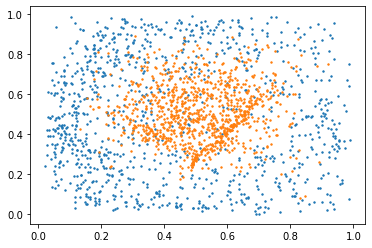

In [5]:
model_normal.visualize()

## Student

In [29]:
reload(cvae_tfp)
data_dim = 2
cond_dim = 1
latent_dim = 4
hidden_dim = 10
x_input = [data, data_cond]
encoder = cvae_tfp.Encoder_Pseudo(data_dim, cond_dim, latent_dim, hidden_dim)
sampler = cvae_tfp.StudentSampler(latent_dim)
encodersampler = cvae_tfp.EncoderSampler(encoder,sampler)
decoder = cvae_tfp.Decoder(data_dim, cond_dim, latent_dim, hidden_dim)
weight = 0.02
model_student = cvae_tfp.CVAE_circle(data_dim, cond_dim, latent_dim, hidden_dim, weight, decoder, encodersampler)
def zero_error(y_true, y_pred):
    return tf.constant(0., dtype='float32')
model_student.compile(optimizer='adam', loss=zero_error)
model_student.evaluate(x = x_input, y = x_input[0])

32/32 [==============================] - 1s 2ms/step - loss: 0.4166


0.4018499255180359

In [34]:
model_student.fit(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)), epochs=5000,\
                 batch_size=data.shape[0], verbose = True)

Epoch 1/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0531
Epoch 2/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0534
Epoch 3/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0529
Epoch 4/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.0533
Epoch 5/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0530
Epoch 6/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0532
Epoch 7/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0525
Epoch 8/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0528
Epoch 9/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0528
Epoch 10/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0531
Epoch 11/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0533
Epoch 12/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0534
Epoch 13/5000
1/1 [=============================

1/1 [==============================] - 0s 7ms/step - loss: 0.0532
Epoch 104/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0530
Epoch 105/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0527
Epoch 106/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0532
Epoch 107/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0526
Epoch 108/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0535
Epoch 109/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0538
Epoch 110/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0523
Epoch 111/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0528
Epoch 112/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0526
Epoch 113/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0533
Epoch 114/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0528
Epoch 115/5000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0536
Epoch 205/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0527
Epoch 206/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0529
Epoch 207/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0532
Epoch 208/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0532
Epoch 209/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0532
Epoch 210/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 211/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0528
Epoch 212/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0526
Epoch 213/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0527
Epoch 214/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0528
Epoch 215/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0528
Epoch 216/5000
1/1 [=======================

1/1 [==============================] - 0s 8ms/step - loss: 0.0525
Epoch 306/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0524
Epoch 307/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0527
Epoch 308/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 309/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0525
Epoch 310/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0538
Epoch 311/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0534
Epoch 312/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0526
Epoch 313/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0525
Epoch 314/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0527
Epoch 315/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0529
Epoch 316/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 317/5000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0523
Epoch 407/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0528
Epoch 408/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0528
Epoch 409/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0529
Epoch 410/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0525
Epoch 411/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0524
Epoch 412/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0528
Epoch 413/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0531
Epoch 414/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0523
Epoch 415/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0525
Epoch 416/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0529
Epoch 417/5000
1/1 [==============================] - ETA: 0s - loss: 0.052 - 0s 6ms/step - loss: 0.0527
Epoch 418/5000
1/1 

1/1 [==============================] - 0s 7ms/step - loss: 0.0524
Epoch 508/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0528
Epoch 509/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0528
Epoch 510/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0527
Epoch 511/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0522
Epoch 512/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0536
Epoch 513/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0525
Epoch 514/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0522
Epoch 515/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0530
Epoch 516/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0523
Epoch 517/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0525
Epoch 518/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0521
Epoch 519/5000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0523
Epoch 609/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0522
Epoch 610/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0536
Epoch 611/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0523
Epoch 612/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0523
Epoch 613/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0526
Epoch 614/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0525
Epoch 615/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0521
Epoch 616/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0527
Epoch 617/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 618/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0531
Epoch 619/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0531
Epoch 620/5000
1/1 [=======================

1/1 [==============================] - 0s 8ms/step - loss: 0.0525
Epoch 710/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0525
Epoch 711/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0522
Epoch 712/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0531
Epoch 713/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0517
Epoch 714/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0529
Epoch 715/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0527
Epoch 716/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0524
Epoch 717/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0523
Epoch 718/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0526
Epoch 719/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 720/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0527
Epoch 721/5000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0525
Epoch 811/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0520
Epoch 812/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0524
Epoch 813/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0523
Epoch 814/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0522
Epoch 815/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0533
Epoch 816/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0515
Epoch 817/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0517
Epoch 818/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0517
Epoch 819/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0521
Epoch 820/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0515
Epoch 821/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0530
Epoch 822/5000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 912/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0529
Epoch 913/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0518
Epoch 914/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0522
Epoch 915/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0525
Epoch 916/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0528
Epoch 917/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 918/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0523
Epoch 919/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0520
Epoch 920/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0523
Epoch 921/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0517
Epoch 922/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0521
Epoch 923/5000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0522
Epoch 1013/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0526
Epoch 1014/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0523
Epoch 1015/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0522
Epoch 1016/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 1017/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0520
Epoch 1018/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0520
Epoch 1019/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0525
Epoch 1020/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0515
Epoch 1021/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0522
Epoch 1022/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0520
Epoch 1023/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0523
Epoch 1024/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0520
Epoch 1113/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0522
Epoch 1114/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 1115/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0525
Epoch 1116/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0525
Epoch 1117/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0517
Epoch 1118/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0525
Epoch 1119/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0525
Epoch 1120/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0521
Epoch 1121/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0519
Epoch 1122/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1123/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 1124/5000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.0528
Epoch 1213/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0526
Epoch 1214/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0521
Epoch 1215/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0521
Epoch 1216/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1217/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0520
Epoch 1218/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0512
Epoch 1219/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1220/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0514
Epoch 1221/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 1222/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0518
Epoch 1223/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0521
Epoch 1224/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0520
Epoch 1313/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0524
Epoch 1314/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 1315/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 1316/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0521
Epoch 1317/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0528
Epoch 1318/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0519
Epoch 1319/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1320/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0520
Epoch 1321/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 1322/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0519
Epoch 1323/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1324/5000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.0525
Epoch 1413/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0518
Epoch 1414/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0520
Epoch 1415/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0520
Epoch 1416/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 1417/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0518
Epoch 1418/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0530
Epoch 1419/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1420/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 1421/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0513
Epoch 1422/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0518
Epoch 1423/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0519
Epoch 1424/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0521
Epoch 1513/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0518
Epoch 1514/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0513
Epoch 1515/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 1516/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1517/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0518
Epoch 1518/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 1519/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1520/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0518
Epoch 1521/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0514
Epoch 1522/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 1523/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 1524/5000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0514
Epoch 1613/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0512
Epoch 1614/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0513
Epoch 1615/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 1616/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0509
Epoch 1617/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 1618/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0515
Epoch 1619/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 1620/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 1621/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0518
Epoch 1622/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 1623/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0518
Epoch 1624/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0520
Epoch 1713/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 1714/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0516
Epoch 1715/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 1716/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 1717/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1718/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 1719/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 1720/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 1721/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 1722/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0513
Epoch 1723/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 1724/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0513
Epoch 1850/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1851/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 1852/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 1853/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 1854/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0518
Epoch 1855/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 1856/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 1857/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0514
Epoch 1858/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0512
Epoch 1859/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 1860/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0514
Epoch 1861/5000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 1950/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 1951/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 1952/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0513
Epoch 1953/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0507
Epoch 1954/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0517
Epoch 1955/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 1956/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 1957/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0519
Epoch 1958/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0521
Epoch 1959/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0515
Epoch 1960/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 1961/5000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0510
Epoch 2049/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0515
Epoch 2050/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0514
Epoch 2051/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 2052/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0512
Epoch 2053/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 2054/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 2055/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 2056/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0513
Epoch 2057/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0517
Epoch 2058/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 2059/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 2060/5000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 2301/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 2302/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0520
Epoch 2303/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0511
Epoch 2304/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 2305/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0510
Epoch 2306/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 2307/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 2308/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0512
Epoch 2309/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0515
Epoch 2310/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 2311/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0515
Epoch 2312/5000
1/1 [===========

1/1 [==============================] - 0s 8ms/step - loss: 0.0512
Epoch 2401/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0517
Epoch 2402/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 2403/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 2404/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0514
Epoch 2405/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0519
Epoch 2406/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 2407/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0511
Epoch 2408/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0513
Epoch 2409/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 2410/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 2411/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 2412/5000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 2649/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 2650/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0514
Epoch 2651/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 2652/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 2653/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0513
Epoch 2654/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 2655/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0525
Epoch 2656/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0513
Epoch 2657/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 2658/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0504
Epoch 2659/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0513
Epoch 2660/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 2749/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0519
Epoch 2750/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 2751/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 2752/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 2753/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 2754/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 2755/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0511
Epoch 2756/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 2757/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 2758/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0514
Epoch 2759/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 2760/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 2990/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 2991/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 2992/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0503
Epoch 2993/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0508
Epoch 2994/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0511
Epoch 2995/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0509
Epoch 2996/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 2997/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 2998/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0511
Epoch 2999/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0511
Epoch 3000/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 3001/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 3090/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0507
Epoch 3091/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0505
Epoch 3092/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 3093/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 3094/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 3095/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 3096/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 3097/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0507
Epoch 3098/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 3099/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0508
Epoch 3100/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 3101/5000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.0515
Epoch 3190/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0500
Epoch 3191/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 3192/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 3193/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 3194/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 3195/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0506
Epoch 3196/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 3197/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0508
Epoch 3198/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 3199/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0504
Epoch 3200/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0507
Epoch 3201/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0517
Epoch 3426/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 3427/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0511
Epoch 3428/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 3429/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 3430/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0505
Epoch 3431/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0514
Epoch 3432/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0507
Epoch 3433/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0511
Epoch 3434/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 3435/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0504
Epoch 3436/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510
Epoch 3437/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0514
Epoch 3526/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0514
Epoch 3527/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 3528/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0506
Epoch 3529/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0507
Epoch 3530/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0508
Epoch 3531/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0508
Epoch 3532/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 3533/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 3534/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 3535/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0508
Epoch 3536/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0506
Epoch 3537/5000
1/1 [===========

Epoch 3750/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0505
Epoch 3751/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0504
Epoch 3752/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 3753/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0507
Epoch 3754/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0513
Epoch 3755/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 3756/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0505
Epoch 3757/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 3758/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 3759/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 3760/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 3761/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0514
Epoch 3762/5000


1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 3850/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0506
Epoch 3851/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 3852/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 3853/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0512
Epoch 3854/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0503
Epoch 3855/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 3856/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0505
Epoch 3857/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 3858/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0513
Epoch 3859/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 3860/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0512
Epoch 3861/5000
1/1 [===========

1/1 [==============================] - 0s 8ms/step - loss: 0.0513
Epoch 4073/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0510
Epoch 4074/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0504
Epoch 4075/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0503
Epoch 4076/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0506
Epoch 4077/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 4078/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0508
Epoch 4079/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 4080/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0516
Epoch 4081/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 4082/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0507
Epoch 4083/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0505
Epoch 4084/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 4173/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0506
Epoch 4174/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 4175/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0512
Epoch 4176/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 4177/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 4178/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0513
Epoch 4179/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 4180/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0512
Epoch 4181/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 4182/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 4183/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0503
Epoch 4184/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0507
Epoch 4273/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0503
Epoch 4274/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 4275/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0503
Epoch 4276/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0499
Epoch 4277/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 4388/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0503
Epoch 4389/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0512
Epoch 4390/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0512
Epoch 4391/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 4392/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 4393/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0505
Epoch 4394/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 4483/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0508
Epoch 4484/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0510
Epoch 4485/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 4486/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0503
Epoch 4487/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0508
Epoch 4488/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 4489/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0501
Epoch 4490/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0513
Epoch 4491/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0508
Epoch 4492/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0515
Epoch 4493/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0506
Epoch 4494/5000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0507
Epoch 4583/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0509
Epoch 4584/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0511
Epoch 4585/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0512
Epoch 4586/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0514
Epoch 4587/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0509
Epoch 4588/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0513
Epoch 4589/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 4590/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0505
Epoch 4591/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0512
Epoch 4592/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510
Epoch 4593/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 4594/5000
1/1 [===========

1/1 [==============================] - 0s 8ms/step - loss: 0.0506
Epoch 4793/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0509
Epoch 4794/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 4795/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0506
Epoch 4796/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0507
Epoch 4797/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0507
Epoch 4798/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0504
Epoch 4799/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.0503
Epoch 4800/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0509
Epoch 4801/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0505
Epoch 4802/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0502
Epoch 4803/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0502
Epoch 4804/5000
1/1 [==========

Epoch 4892/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0505
Epoch 4893/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0505
Epoch 4894/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0503
Epoch 4895/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0505
Epoch 4896/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0505
Epoch 4897/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 4898/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0501
Epoch 4899/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 4900/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0504
Epoch 4901/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0505
Epoch 4902/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0507
Epoch 4903/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0503
Epoch 4904/5000


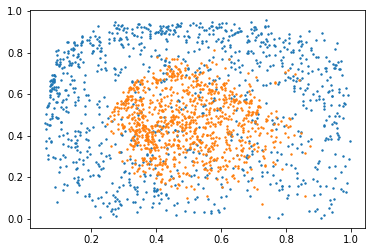

In [38]:
model_student.visualize()

In [39]:
pseudoinput = model_student.encodersampler.trainable_variables[-2:]
df,_,_ = model_student.encodersampler.encoder(pseudoinput)

In [40]:
df

<tf.Tensor: shape=(), dtype=float32, numpy=1586.3132>